# Final Project Submission

Please fill out:
* Student name: Sarah Lowing
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Abhineet
* Blog post URL: https://wordpress.com/post/datamonsterdotblog.wordpress.com/47


## Overview
For this analysis we'll be using the King's County Sales dataset, which can be found in kc_house_data.csv.  Each record represents a house sale in the Seattle area for the year 2021-2022.  We will use this data to determine the fair market value of homes coming onto the market based on a table of comparable homes (comps).  This automation the process of generating lists of comps to aid real estate agents and their clients in navigating the complex pricing structures around home sales. This has real world value in making available an accurate statistical model, with a standard p-value of .05 to discern which variables are most likely to affect home prices and by how much.

### Business Understanding
Comps are used daily to determine the value of homes coming onto the market by buyer, sellers and real estate professionals. Providing a service to automate the process by which comps are generated has a value to these three groups. Real estate professionals have traditionally used MLS to to run comparative market analysis, which is not available to non-professionals.  Therefore, this information will be of additionally high value to home owners and buyers as a way to generate concrete and accurate ideas of pricing structures, and therefor what to expect for their own buying and selling experiences, as well as a general idea of which features of their homes might be worth improving before sale. 

### Data Understanding
After checking our data for missing or null values, we wil begin performing some simple statistical analysis to determine which variables have an existing and obvious correlation to our target variable, 'price'.  We'll examine the format of the data (numeric vs categorical, continuous vs discrete) to determine what, if any, transformations need to take place in order to perform  colinearity..  And finally we'll check for normality, and look to apply transformations (linear, logarythmic, polynomial regression or  to any data that does not conform to our L.I.N.E. acronym and is useful for our model and analysis. 

## Preliminary Data Analysis

In [1]:
# import neccessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

### Inspect and Clean Data

In [2]:
## Check the columns and first few rows
df= pd.read_csv('Data/kc_house_data.csv')
len(df)

30155

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [49]:
# Generate summary statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


We can see some of our mean values here, as well as visually inspect for for any missing values or irregularities.  So far it looks good!

In [50]:
#checking for null values
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [51]:
#Because of the small number of NaN values, we can drop null rows
df.dropna(inplace=True)

### Inspect Columns and Investigate Datatypes

In [16]:
#Visualize datatypes for future analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

We can see that the data has several different types. Some potentially relevant data for 'price' is categorical, like 'waterfront' and 'condition'.  We'll need to OHE these features if we'd like to add those variables to our model.
None of our numeric variables are categorical in nature, with the exception of 'id', 'lat' and 'long' which serve as unique identifiers.  While we won't need these for our statistical analysis, 'lat' and 'long' could come in handy later if we want to map home sales.  This is also a relatively long list of variables/columns.  If we were to run an OLE we would likely see that there was strong colinearity- that some of our fefatures were not independant.  We'll have to shorten this list for sure.  We can start by looking at whichc variables are redundent.  Examining the column values will help us to determine which of the variables might be close to or copies of the same information.

In [9]:
# Closer look at column values
#x= open('Data/column_names.md')
#print(x.read())

Only a few variables seem like duplicates.  We can see that sgft_living and sqft_above are similar, so we'll only use the former.  Let's dig in deeper though and take a look at a correlation heatmap of our dataframe to verify that co-linearity.

## Numeric Data

We'll begin by looking at the correlation of 'price' with all numeric categories.  We can see immediately that categorical numeric variables like 'id', 'lat' and 'long' are not useful in this context, so we'll create a subset of the continous numeric variables that look more promising.  The variables 'sqft_above' and 'sqft_living' have strong colinearity, so we'll drop 'sqft_above'.

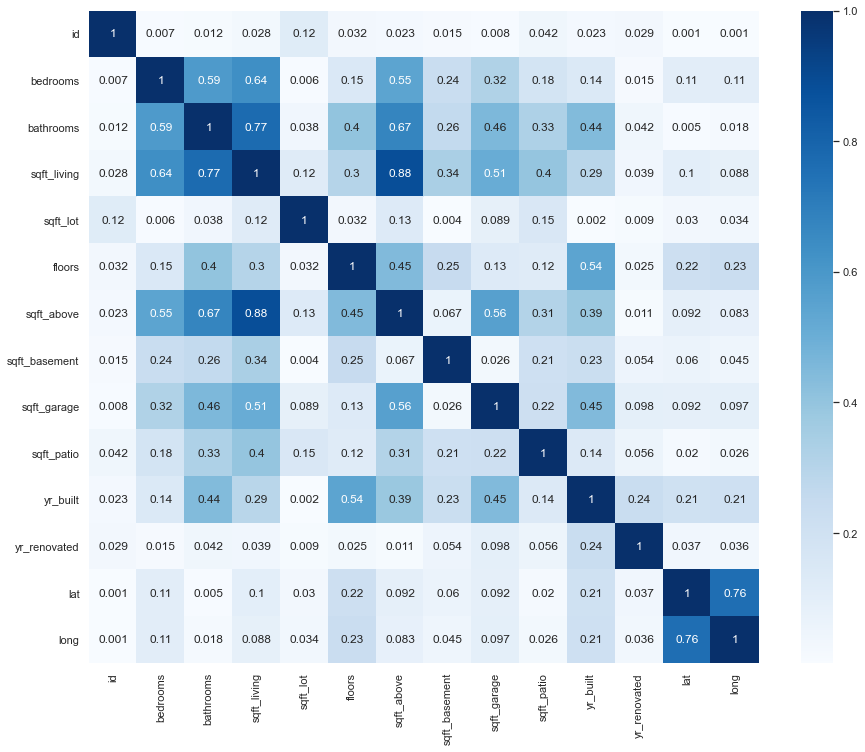

In [12]:
df_predictors = df.drop(columns=['price'])
corr = round(abs(df_predictors.corr()),3)
sns.set(rc = {'figure.figsize':(15,12)})
sns.heatmap(corr, cmap="Blues", annot=True);

In [8]:
kc_subset_dn= df[['price','sqft_living',
                  'bathrooms']]
abs(kc_subset_dn.corr()["price"]).sort_values(ascending=False)

price          1.000000
sqft_living    0.608616
bathrooms      0.480337
Name: price, dtype: float64

In [ ]:
df_kc

Our next step is to generate scatterplots to view the distributions of the continuous numeric variables that have the highest correlation to price and look for the visual markers of a linear relationship 

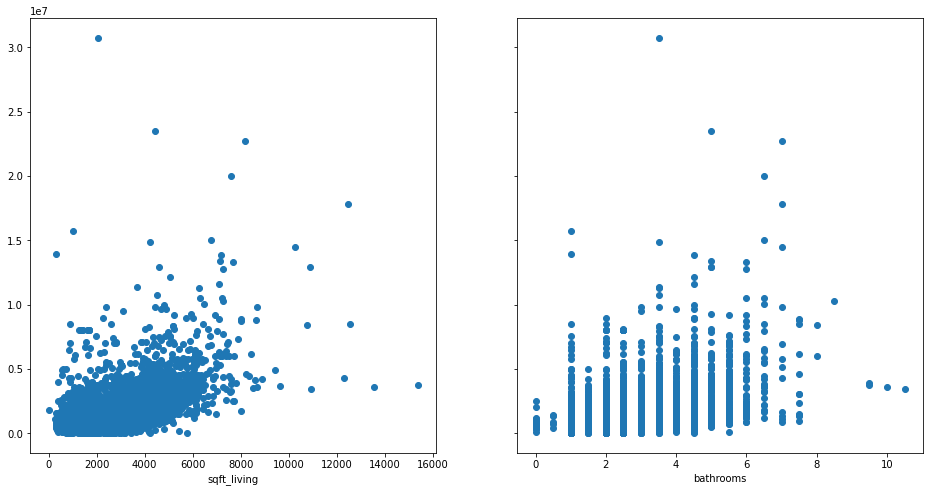

In [9]:
# Visualize relationships between variables and price
fig,axes= plt.subplots(ncols=2, figsize=(16,8), sharey=True)

for i, c in enumerate(kc_subset_dn.drop('price', axis=1).columns):
    ax=axes[i]
    ax.scatter(kc_subset_dn[c], kc_subset_dn['price'])
    ax.set_xlabel(c)

In [44]:
df['sqft_living'].describe()

count    30111.000000
mean      2113.342798
std        973.453260
min          3.000000
25%       1420.000000
50%       1920.000000
75%       2620.000000
max      15360.000000
Name: sqft_living, dtype: float64

That 3 sqft_living doesnt make sense.  Let's make sure there aren't too many erroneous values

In [69]:
df['sqft_living'].sort_values()

14977        3
8694       260
8391       290
23622      290
5811       290
         ...  
1948     12300
18100    12470
635      12540
25490    13540
9888     15360
Name: sqft_living, Length: 30111, dtype: int64

In [75]:
#df.loc[df['sqft_living']>=15000]
#df.loc[df['sqft_living']<=5]

Looks like the 3 sqft is the only obviously wrong value, but we'll double check some of the smallest and largest sqft values by looking up the houses on Redfin to find the square footage, compare, and fix (as needed) some of the outlier records for sqft_living.

In [52]:
#identified record number for sqft_living == 3 and changed value to sqft from Redfin 
df.at[14977, 'sqft_living']= 3325

In [10]:
#did it work? Yes..
#df.loc[df['id']==1549500215]

In [49]:
#nothing obviously kooky here to fix
df['bathrooms'].describe()

count    30111.000000
mean         2.335708
std          0.888293
min          0.000000
25%          2.000000
50%          2.500000
75%          3.000000
max         10.500000
Name: bathrooms, dtype: float64

In [56]:
y=df['price']
X=df['sqft_living']

sgft_model = sm.OLS(y, sm.add_constant(X))
sqft_results = sgft_model.fit()

In [57]:
linear_rainbow(sqft_results)

(1.115720052981009, 9.348873145408989e-12)

In [59]:
X

0        1180
1        2770
2        2880
3        2160
4        1120
         ... 
30150    1910
30151    2020
30152    1620
30153    2570
30154    1200
Name: sqft_living, Length: 30111, dtype: int64

This confirms that sqft_living has a non-linear relationship with price, and we'll need to apply a non-linear transformation (log, interaction terms, exponential/polynomial)

In [61]:
X_quad = X.copy()
X_quad['sq_living'] = X_quad**2
X_quad= 

0                                                         1180
1                                                         2770
2                                                         2880
3                                                         2160
4                                                         1120
                                   ...                        
30151                                                     2020
30152                                                     1620
30153                                                     2570
30154                                                     1200
sq_living    0        1392400
1        7672900
2        829...
Name: sqft_living, Length: 30112, dtype: object

In [63]:
#squared_results = sm.OLS(y, sm.add_constant(X_quad)).fit()

There is a clear relationship between both sqft_living and bathrooms to price, but the values will need to be normed before we can use them in our model- the plots demonstrate that there is a non-linear relationshipp by their distributions , and we'll need to fix that by applying a transformation.

## Categorical Data
Let's begin by looking at some graphs of our categorical data to see what might be a good candidate for OHE transformation.  We'll use bargraphs to see if there's a linear relationship between price and our variables.

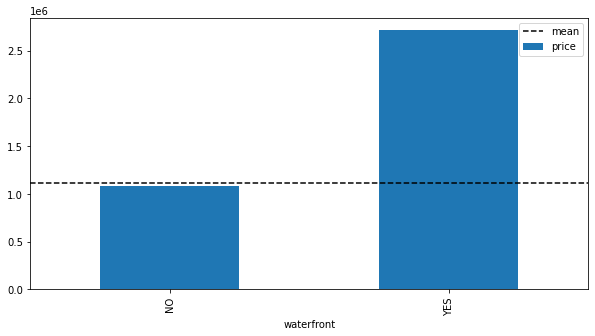

In [74]:
# Waterfront sns.barplot(data=df, x='waterfront', y='price')
fig, ax = plt.subplots(figsize=(10,5))
df.groupby("waterfront").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

In [39]:
# nuisance doesn't look like it's relevant
fig, ax = plt.subplots(figsize=(10,5))
df.groupby("nuisance").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

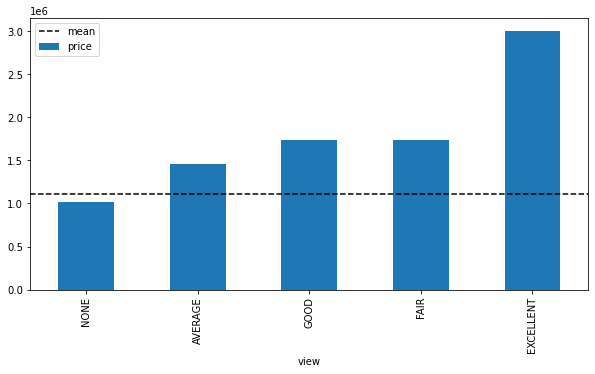

In [78]:
#view
fig, ax = plt.subplots(figsize=(10,5))
df.groupby("view").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

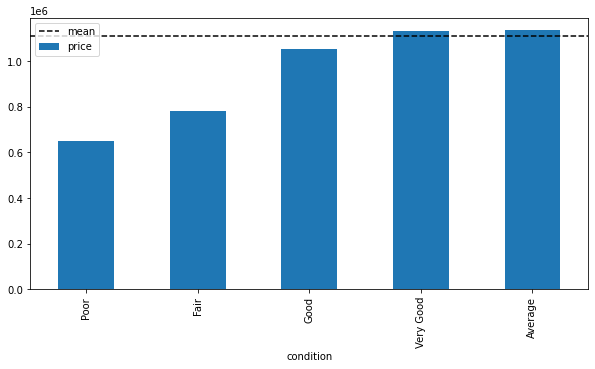

In [52]:
fig, ax = plt.subplots(figsize=(10,5))
df.groupby("condition").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

Of the categorical variables, waterfront and condition seem the most likely to have a linear relationship with price

In [ ]:

y_raw = df["price"]
X_raw_cat = categoricals
X_raw_cat = pd.get_dummies(X_raw_cat)

X_raw_cat.drop(['waterfront_NO', 'greenbelt_NO',
               'nuisance_YES', 'grade_2 Substandard', 'condition_Poor',
               'heat_source_Electricity', 'sewer_system_PUBLIC' ], axis=1, inplace=True)

In [41]:
#generate histograms of categorical variables to check for normal distribution
cat_colinearity= X_raw_cat
corr = round(abs(cat_colinearity.corr()),3)
sns.set(rc = {'figure.figsize':(15,12)})
sns.heatmap(corr, cmap="Blues", annot=True);

## Modeling

### Checking L.I.N.E.

* Linear relationship between the response variable (y) and predictor (x)

* Data is independent: 1. Data avoids collinearity (features can't be used to predict each other)  2.  Data is not autocorrelated (correlated with itself)

* Model residuals are normally distributed

* Homoscedasticity- data has an equal variance

Per Assumptions for Linear Regression: "Looking at the residuals is the single best way to flag potential violations of linear regression assumptions and figure out what to do about them."


#### Shifting our Model to Improve Intercept Interpretability
So far our models have been unchanged by any kind of linear or logarithmic transformations.  We'll take time now to: 
* zero centering some of our variables to make more interpretable predictions of the mean value of a house with stated features.

* Log transform irregular distributions in "sqft_living" to normalize distribution

* OHE conditional the variables 'waterfront' and 'nuisance' to add to our multiple linear regression model

If the model is correctly specified, then we should not see curvature in the residuals

In [22]:
y_raw = df["price"]
X_raw = df[['sqft_living', 'waterfront', 'bathrooms']]
X_raw = pd.get_dummies(X_raw, columns=["waterfront"], drop_first=True)

X_raw

,sqft_living,bathrooms,waterfront_YES
0,1180,1.0,0
1,2770,2.5,0
2,2880,2.0,0
3,2160,3.0,0
4,1120,2.0,0
...,...,...,...
30150,1910,2.0,0
30151,2020,2.0,0
30152,1620,2.0,0
30153,2570,2.5,0


In [23]:
baseline_model = sm.OLS(y_raw, sm.add_constant(X_raw))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     6847.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:40:18   Log-Likelihood:            -4.4760e+05
No. Observations:               30111   AIC:                         8.952e+05
Df Residuals:                   30107   BIC:                         8.952e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9.736e+04   1.12e+04     -8.

In [42]:
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(baseline_results)

(1.0981647799843925, 4.641430481803289e-09)

In [ ]:
# 2nd model, interactions

y_2 = df_kc["price"]
X_2 = df_kc[['sqft_living', 'waterfront', 'zip']]
X_2 = pd.get_dummies(X_2, columns=['zip'])
X_2.drop(['zip_98116'], axis=1, inplace=True)
X_2['sqft_Medina'] = X_2['sqft_living']* (X_2['zip_98039']) 
X_2['sqft_Skykomish'] = X_2['sqft_living']* (X_2['zip_98288']

# Notes/Thing to Try

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
y=df['price']
X=X_raw

In [35]:
linear_results = sm.OLS(y, sm.add_constant(X)).fit()


r-squared: 0.4055094438668765


In [ ]:
#to check column names after OHE
"""
df['column_name'].value_counts()
"""

# Seaborne regplot to visualize original data with regression line 

"""
(need to use after making model with OLS)
sns.regplot(x="sqft_living", y="price", data=df);
"""

# checking for linearity in residuals
"""linear_model = sm.OLS(y, sm.add_constant(X))
linear_results = linear_model.fit()

fig, ax = plt.subplots()

ax.scatter(y, linear_results.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot");"""

# To make a model
"""

data = pd.read_csv("auto-mpg.csv")
y_raw = data["mpg"]
X_raw = data[["weight", "model year"]]
X_raw

baseline_model = sm.OLS(y_raw, sm.add_constant(X_raw))
baseline_results = baseline_model.fit()
print(baseline_results.summary())
"""

# to transform values log

"""
X_weight_log = X_raw.copy()

X_weight_log["log(weight)"] = np.log(X_weight_log["weight"])

# Visually inspect raw vs. transformed values
X_weight_log[["weight", "log(weight)"]]

"""
# Plot distributions of raw vs. transformed values
# (scales are so different that it's not reasonable to share an x-axis)
"""
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7,3))
ax1.hist(X_weight_log["weight"])
ax1.set_xlabel("weight")
ax2.hist(X_weight_log["log(weight)"], color="orange")
ax2.set_xlabel("log(weight)");
"""

# compare original to log
"""
weight_log_model = sm.OLS(y_raw, sm.add_constant(X_weight_log))
weight_log_results = weight_log_model.fit()

print(f"""
Baseline model adjusted R-Squared:    {baseline_results.rsquared_adj}
log(weight) model adjusted R-Squared: {weight_log_results.rsquared_adj}
""")

"""

# Map and Zipcodes

In [37]:
X_sqft_log = X_raw.copy()

X_sqft_log["log(sqft_living)"] = np.log(X_sqft_log["sqft_living"])

# Visually inspect raw vs. transformed values
X_sqft_log[["sqft_living", "log(sqft_living)"]]

,sqft_living,log(sqft_living)
0,1180,7.073270
1,2770,7.926603
2,2880,7.965546
3,2160,7.677864
4,1120,7.021084
...,...,...
30150,1910,7.554859
30151,2020,7.610853
30152,1620,7.390181
30153,2570,7.851661


Text(0.5, 0, 'log(sqft_living)')

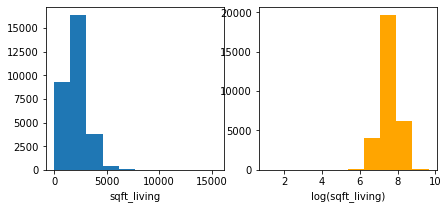

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7,3))
ax1.hist(X_sqft_log["sqft_living"])
ax1.set_xlabel("sqft_living")
ax2.hist(X_sqft_log["log(sqft_living)"], color="orange")
ax2.set_xlabel("log(sqft_living)")

In [41]:
X_sqft_log.drop('sqft_living', axis=1, inplace=True)

y_log = y_raw
X_log_model = sm.OLS(y_log, sm.add_constant(X_sqft_log))
X_log_results = X_log_model.fit()


print(X_log_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     4872.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:09:01   Log-Likelihood:            -4.4948e+05
No. Observations:               30111   AIC:                         8.990e+05
Df Residuals:                   30107   BIC:                         8.990e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.712e+06   9.96e+04  

In [ ]:
log_model = sm.OLS(y_log, sm.add_constant(X_log))
log_results = log_model.fit()
print(baseline_results.summary())

## Map and Neighborhoods

In [ ]:

import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

In [ ]:
#Define coordinates of where we want to center our map
kc_coords = [47.6561, -122.005]

#Create the map
my_map = folium.Map(location = kc_coords, zoom_start = 13)

#Display the map
my_map

In [ ]:
#Create the dataframe containing the data we want.
dfmap.zipcode = df_kc.zip.astype(int)
zipcode_means = []
for i in dfmap.zipcode.unique().tolist():
    val = dfmap[dfmap['zip'] == i]['price'].mean()
    lat = dfmap[dfmap['zip'] == i]['lat'].mean()
    long = dfmap[dfmap['zip'] == i]['long'].mean()
    zipcode_means.append([str(i), val, lat, long])
xall = []
yall = []
latall = []
longall = []
for val in zipcode_means:
    xall.append(val[0])
    yall.append(val[1])
    latall.append(val[2])
    longall.append(val[3])
tdf = pd.DataFrame(list(zip(xall, yall, latall, longall)),
                    columns = ['Zipcode', 'Price', 'Latitude', 'Longitude'])

In [2]:
import geopandas as gpd



ModuleNotFoundError: No module named 'geopandas'

In [18]:
#extract zip codes.  We should have 224 different zipcodes -but there's an extra 176
df['zip'] = df['address'].str.findall(r'([0-9]\d+)').apply(
    lambda x: x[-1] if len(x) >= 1 else '')

In [27]:
# examine zip codes, kc county homes ahould start with 98 but we clearly have some that do not 
zip_counts= df['zip'].value_counts()
zip_counts

98042    992
98038    858
98115    761
98103    761
98117    748
        ... 
47575      1
11373      1
68826      1
64156      1
48503      1
Name: zip, Length: 399, dtype: int64

In [47]:
# closer look at address to double check that entries are erroneous, and not our code.  Clearly some bad data in here
df_bad_zips = df[~df['zip'].astype(str).str.startswith('98')]
print(df_bad_zips['address'])

12       5712 A Street, Omaha, Nebraska 68106, United S...
53       1820 South State Street, Vineland, New Jersey ...
62       1804 Spruce Street, McLeansboro, Illinois 6285...
159      626 13th Street, Union City, New Jersey 07087,...
172      11th Avenue, West Babylon, New York 11704, Uni...
                               ...                        
30029    Avenue Cuts, 34 Ridge Rd, North Arlington, New...
30044    36th Avenue, Kenosha, Wisconsin 53142, United ...
30116    57th Street Lane NW, Rochester, Minnesota 5590...
30129    214 B, Mount Laurel, New Jersey 08054, United ...
30144    2954 Northwest 85th Street, Miami, Florida 331...
Name: address, Length: 914, dtype: object


In [48]:
#Does the address have Seattle, Washington in it?  
df_bad_zips[df_bad_zips['address'].str.contains('Washington')]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zip
4137,2902200584,12/11/2021,750000.0,2,2.0,880,892,3.0,NO,NO,...,880,0,0,320,2017,0,"2213 Highway a, Washington, Missouri 63090, Un...",38.531593,-91.021341,63090
7064,597000591,4/13/2022,715000.0,3,2.5,1530,1101,2.0,NO,NO,...,1040,490,0,375,2009,0,"Beacon Ave, Washington, Pennsylvania 15301, Un...",40.105940,-80.317920,15301
10445,1959701116,3/17/2022,1325000.0,3,2.0,1440,980,2.0,NO,NO,...,960,480,0,510,2018,0,"2708 Highway a, Washington, Missouri 63090, Un...",38.534190,-91.020571,63090
12986,6003500644,11/21/2021,759950.0,2,2.0,1020,740,2.0,NO,NO,...,680,340,0,340,2020,0,"1728 East 11th Avenue, Spokane, Washington 992...",47.645200,-117.384760,99202
17304,2770602496,8/20/2021,789995.0,2,2.0,1310,1220,2.0,NO,NO,...,840,470,0,310,2013,0,"21st Avenue, Clarkston, Washington 99403, Unit...",46.389970,-117.056550,99403
18767,2902200797,9/7/2021,1224000.0,3,2.0,1640,1040,3.0,NO,NO,...,1640,0,0,580,2020,0,"2368 Highway a, Washington, Missouri 63090, Un...",38.524842,-91.025180,63090
22537,5414100061,1/2/2022,679950.0,2,2.0,1170,761,3.0,NO,NO,...,1170,0,0,290,2021,0,"East 32nd Avenue, Spokane, Washington 99203, U...",47.625580,-117.395840,99203
25314,1703400362,2/15/2022,879000.0,3,2.0,1610,1005,3.5,NO,NO,...,1610,0,0,230,2021,0,"4736 East 35th Avenue, Spokane, Washington 992...",47.622819,-117.347162,99223


In [49]:
# Doesn't look that way, so we'll drop the entries from the df in that are not from the Seattle area (df_bad_zips)
df_kc = df[df['zip'].astype(str).str.startswith('98')]
len(df_kc)

29241

In [52]:
#Check if we've got the right number of records 
bool(len(df_kc) + len(df_bad_zips)==len(df))

True

In [ ]:
import re


In [ ]:
re.findall(^\d, 98)

In [ ]:
pip install geopy
from geopy.geocoders import Nominatim


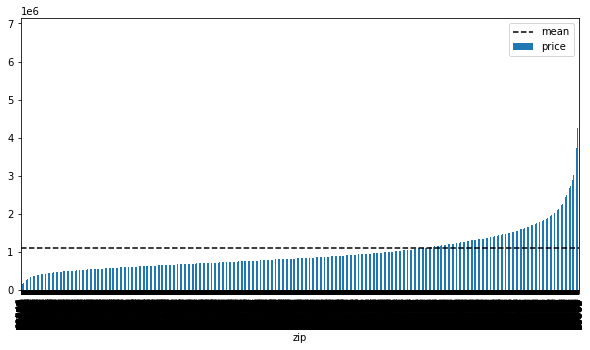

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
df.groupby("zip").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=df["price"].mean(), label="mean", color="black", linestyle="--")

ax.legend();

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
zip,,,,,,,,,,,,,,,,,,,,,
01541,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
02066,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
02134,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
02149,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
02341,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99403,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
99501,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
99504,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [6]:
zips= pd.read_csv('zips/zip_code_database.csv')
zips_kc= zips[zips['zip'].astype(str).str.startswith('981')]
zips_kc

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population
186,981,PO BOX,0,Carolina,NaN,Isla Verde,PR,Carolina,America/Puerto_Rico,NaN,NaN,US,18.40,-65.98,0
3678,9810,MILITARY,0,Apo,NaN,NaN,AE,NaN,NaN,NaN,EU,TR,0.00,0.00,0
3679,9811,MILITARY,0,Dpo,NaN,NaN,AE,NaN,NaN,NaN,NaN,US,0.00,0.00,0
3680,9812,MILITARY,0,Dpo,NaN,NaN,AE,NaN,NaN,NaN,NaN,US,0.00,0.00,0
3681,9813,MILITARY,0,Dpo,NaN,NaN,AE,NaN,NaN,NaN,NaN,US,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41860,98191,UNIQUE,0,Seattle,NaN,Qwest,WA,King County,America/Los_Angeles,206,NaN,US,47.61,-122.33,0
41861,98194,PO BOX,0,Seattle,NaN,NaN,WA,King County,America/Los_Angeles,206,NaN,US,47.61,-122.33,299
41862,98195,UNIQUE,0,Seattle,NaN,Univ Of Washington,WA,King County,America/Los_Angeles,206,NaN,US,47.65,-122.31,192
41863,98198,STANDARD,0,Seattle,"Des Moines, Normandy Park, Seatac",Redondo Beach,WA,King County,America/Los_Angeles,"206,253",NaN,US,47.38,-122.31,34610


In [ ]:
zips_kc.rename(columns={"primary_city": "neighborhood"}, inplace=True)
zips_kc

In [ ]:
#trying to get town names:
# Didn't work:
#df_kc['neighborhood']= np.where(df_kc['zip']== zips_kc['zip'], zips_kc['neighborhood'], "none")

#Didn't work
#def f[]:
#df_kc['neighborhood']= np.where(zips_kc_final['primary_city']) if
 #   df_kc.apply(lambda row: df_kc['zip']==zips_kc_final['zip'], axis=1) 

In [ ]:
df_kc['zip']= df_kc['zip'].apply(pd.to_numeric)  
zips_kc_final=zips_kc['zip'].astype(int).copy()
zips_kc_final['neighborhood']= zips_kc['primary_city'].copy()